<a href="https://colab.research.google.com/github/gustavox0/Proyect_Manegement/blob/main/Salazar_Monjaras_M8B1_AI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción de la tarea

Sabiendo que tienes acceso a La solución AWS MLOps [1] que es un Framework que te ayuda a optimizar y aplicar las mejores prácticas de arquitectura para la producción de modelos de aprendizaje automático (ML), se te pide investigar como data scientist y proponer los pasos a seguir para poner en producción el case base reasoning [2].

Basarse en la referencia [1] y [2] y hacer una investigación de los pasos a seguir para la puesta en producción el case base reasoning.


**Documentación relevante:**

[1] [Solucion AWS MLOps](https://github.com/aws-solutions/mlops-workload-orchestrator)

[2] [CBR](https://arxiv.org/abs/2104.00409)

## Descripción de CBR

El CBR es una técnica de aprendizaje automático basada en la resolución de problemas nuevos a partir de la experiencia.  La experiencia en este contexto,es entendida como el recuerdo de casos previamente resueltos y que son utilizados para resolver el problema nuevo. Esta metodología de aprendizaje se basa en cuatro pasos: 1 **(Retrieve o recuperar)** recuperación de casos más similares, 2 **(Reuse o reutilizar)** adaptación a dichos casos para proponer una solución al nuevo problema, 3 **(Revise o revisar)** comprobación de la validez de la solución propuesta y 4 **(Retain o retener)** el almacenamiento posterior de la solución para ser utilizada posteriormente en un nuevo problema. Estos pasos de la metodología CBR se muestran en el diagrama siguiente:


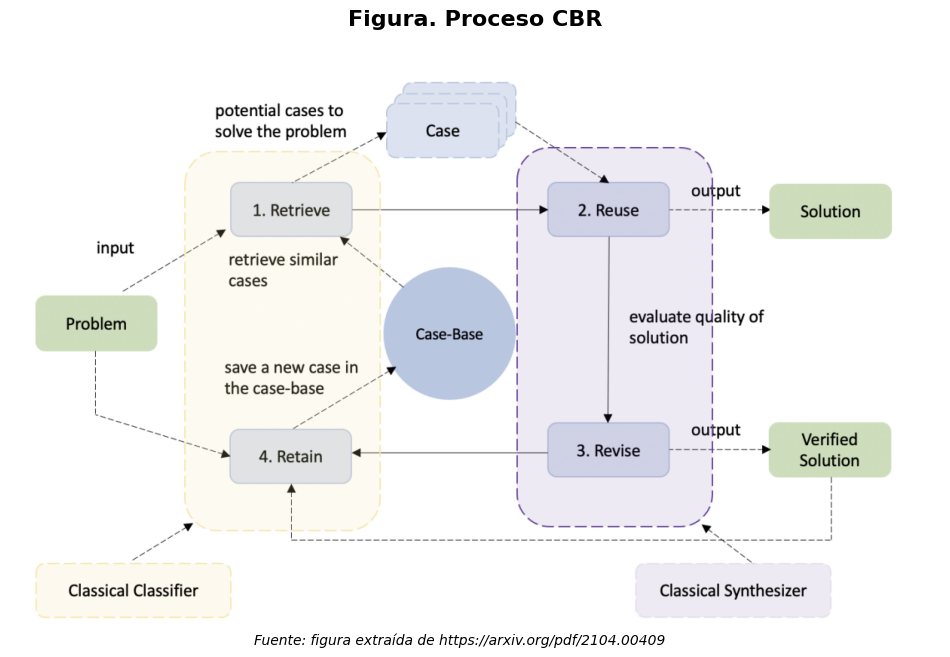

In [19]:
from skimage import io
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/gustavox0/Proyect_Manegement/main/diagrama00.png"

# Cargar y mostrar imagen
image = io.imread(url)
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.title('Figura. Proceso CBR', fontsize=16, fontweight='bold', pad=20)
plt.figtext(0.5, 0.20, 'Fuente: figura extraída de https://arxiv.org/pdf/2104.00409',
            ha='center',
            fontsize=10,
            style='italic')
plt.axis('off')
plt.show()

Cada uno de los pasos se explica a continuación:

1. Retrieve (recuperar): Ante un nuevo problema, el sistema busca en la base de datos casos similares al actual.
2. Reuse (reusar): Se toma el caso recuperado y se adapta su solución al problema nuevo.
3. Revise (revisar): Se prueba y evalúa la calidad de la solución propuesta.
4. Retain (retener o almacenar): el problema y su solución se incorporan a la base de datos para futuros problemas.

## Descripción de arquitectura AWS MLOps

A continuación describo las herramientas de AWS para poner en producción el CBR.

1. Herramientas AWS MLOps para retrieve (recuperar)

    Dentro de AWS, Amazon S3 se utiliza para almancenar los casos previos de acuerdo con el problema que queramos resolver. Adicionalmente, Amazon SageMaker Model implementa la lógica que busca la similaridad al problema que tenemos por resolver (KNN, clustering, etc.) Finalmente, Amazon API Gateway recibe la consulta del usuario y ejecuta la búsqueda del caso que más se parezca al problema que queremos resolver.

2. Herramientas AWS MLOps para reuse (reusar)

    Amazon SageMaker Endpoint permite encontrar el mejor modelo que se adapta a la solución. Lambda es otra funcionalidad de AWS que permite aplicar reglas de adaptabilidad a la solución que se busca. Con la API Gateway se entrega la solución propuesta al usuario.

3. Herramientas AWS MLOps para revise (revisar y validar)

    Los resultados de la prueba para validar la solución se guardan en Amazon S3. Con Amazon CloudWatch y SageMaker Model Monitor se monitorea la calidad y precisión de la solución propuesta.

4. Herramientas AWS MLOps para retain (retener o almacenar)

    El problema resuelto con su solución se guardan en Amazon S3 para ser consultados posteriormente. Con AWS CodePipeline y SageMaker el modelo se re-entrena, se valida y se despliega automáticamente (entrega continua o Continuos Delivery-CD). Finalmente con Amazon SageMaker Model Registry se actualiza y registra la nueva versión del modelo. Esta herramienta permite la gobernanza y gestión de los modelos. En este paso el modelo se mantiene al dia en la base de datos asi como un entrenamiento continuo (CT)



## Diagrama de la adaptación para la producción CBR mediante AWS MLOps

En el diagrama siguiente se muestran los pasos a seguir para poner en producción el case base reasoning utilizando las herramientas de AWS MLOps

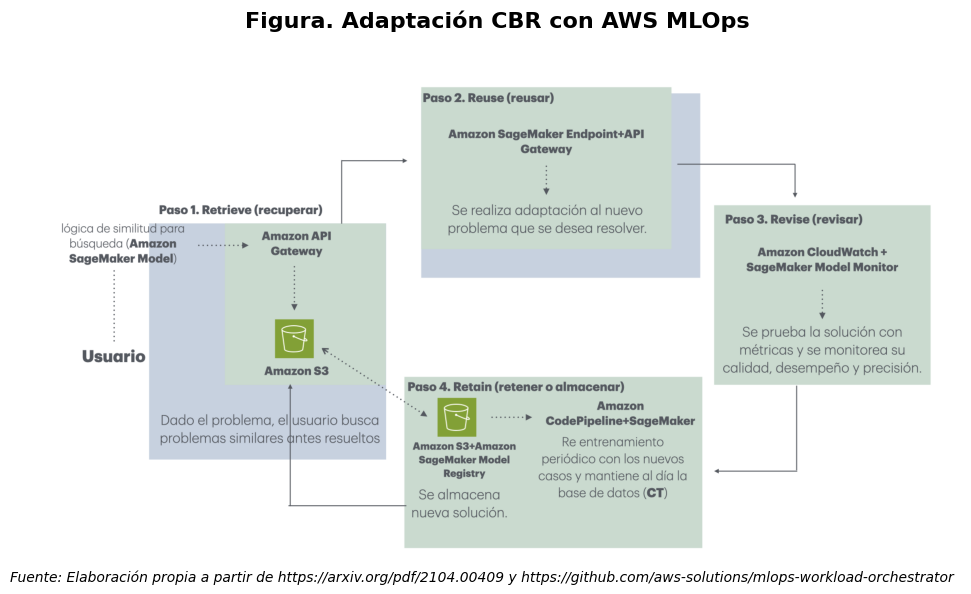

In [17]:
url2 = "https://raw.githubusercontent.com/gustavox0/Proyect_Manegement/main/diagrama001.png"

# Cargar y mostrar imagen
image = io.imread(url2)
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.title('Figura. Adaptación CBR con AWS MLOps', fontsize=16, fontweight='bold', pad=20)
plt.figtext(0.5, 0.23, 'Fuente: Elaboración propia a partir de https://arxiv.org/pdf/2104.00409 y https://github.com/aws-solutions/mlops-workload-orchestrator',
            ha='center',
            fontsize=10,
            style='italic')
plt.axis('off')
plt.show()